# Scvelo environment

In [ ]:
import scanpy as sc
import scvelo as scv
from celldancer_adapted_utils import load_files
import os

adata_mivelo, _ = load_files("pancreas", 30)
os.rmdir("data/")
adata = scv.datasets.pancreas()
adata = adata[:,adata_mivelo.var_names].copy()
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2500)
sc.pp.neighbors(adata)
scv.pp.moments(adata)
#sc.tl.umap(adata)
adata.write_h5ad("celldancer_adata_preproc.h5ad")

# Celldancer environment

In [ ]:
import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt
import celldancer as cd
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
import pandas as pd
import celldancer.utilities as cdutil
import scanpy as sc

In [ ]:
!ls ../../outputs/final_anndatas/pancreas/miVelo.h5ad

In [ ]:
adata = sc.read_h5ad("../../outputs/final_anndatas/pancreas/miVelo.h5ad")

In [ ]:
cdutil.adata_to_df_with_embed(adata,
                              us_para=['Mu','Ms'],
                              cell_type_para='clusters',
                              embed_para='X_umap',
                              save_path='cell_type_u_s.csv')
                              #gene_list=['Hba-x','Smim1'])

In [ ]:
df = pd.read_csv("cell_type_u_s.csv")

In [ ]:
loss_df, cellDancer_df=cd.velocity(df,\
                                   gene_list=None,\
                                   permutation_ratio=0.125,\
                                   n_jobs=-1)

In [ ]:
cellDancer_df.to_csv("celldancer_df.csv")

In [ ]:
cellDancer_df

In [ ]:
cellDancer_df = pd.read_csv("celldancer_df.csv")
cellDancer_df

In [ ]:
# compute cell velocity
cellDancer_df_u_s=cd.compute_cell_velocity(cellDancer_df=cellDancer_df,
                                       projection_neighbor_choice='embedding',
                                       expression_scale='power10',
                                       projection_neighbor_size=100,
                                       speed_up=None)

In [ ]:
cellDancer_df_u_s.to_csv("cd_df.csv")

In [ ]:
import pandas as pd
cellDancer_df_u_s = pd.read_csv("cd_df.csv")
cellDancer_df_u_s

In [ ]:
adata.shape[0] * adata.shape[1]

In [11]:
#import celldancer as cd
import scanpy as sc
import pandas as pd
import numpy as np 

# Read the DataFrame from CSV
cellDancer_df_u_s = pd.read_csv("cd_df.csv")

# Read the AnnData object
#adata = sc.read_h5ad("celldancer_adata_preproc.h5ad")

# Initialize velocity layers with zeros
adata.layers["velocity"] = np.zeros(adata.shape)
adata.layers["velocity_u"] = np.zeros(adata.shape)
#adata.obs["pseudotime"] = 0

# Iterate over the DataFrame and update the layers
for i, cell_idx in enumerate(cellDancer_df_u_s.cellIndex):
    gene_name = cellDancer_df_u_s.gene_name[i]
    alpha = cellDancer_df_u_s.alpha[i]
    beta = cellDancer_df_u_s.beta[i]
    gamma = cellDancer_df_u_s.gamma[i]
    unspliced = cellDancer_df_u_s.unsplice[i]
    spliced = cellDancer_df_u_s.splice[i]
    #pseudotime = cellDancer_df_u_s.pseudotime[i]

    velocity_u = alpha - beta*unspliced
    velocity = beta*unspliced - gamma*spliced
    
    # Update the velocity layers correctly
    adata.layers["velocity"][cell_idx, adata.var_names.get_loc(gene_name)] = velocity
    adata.layers["velocity_u"][cell_idx, adata.var_names.get_loc(gene_name)] = velocity_u
    #adata.obs["pseudotime"] = pseudotime
    
    # Print progress every 1000 iterations
    if i % 1000 == 0:
        print(f"{np.round(i/len(cellDancer_df_u_s)*100,2)}%")

# Save the updated AnnData object
adata.write_h5ad("cd_adata.h5ad")

print("Relocation of DataFrame to AnnData completed successfully.")


0.0%
0.01%
0.02%
0.03%
0.04%
0.05%
0.06%
0.06%
0.07%
0.08%
0.09%
0.1%
0.11%
0.12%
0.13%
0.14%
0.15%
0.16%
0.17%
0.18%
0.18%
0.19%
0.2%
0.21%
0.22%
0.23%
0.24%
0.25%
0.26%
0.27%
0.28%
0.29%
0.3%
0.3%
0.31%
0.32%
0.33%
0.34%
0.35%
0.36%
0.37%
0.38%
0.39%
0.4%
0.41%
0.42%
0.42%
0.43%
0.44%
0.45%
0.46%
0.47%
0.48%
0.49%
0.5%
0.51%
0.52%
0.53%
0.54%
0.54%
0.55%
0.56%
0.57%
0.58%
0.59%
0.6%
0.61%
0.62%
0.63%
0.64%
0.65%
0.65%
0.66%
0.67%
0.68%
0.69%
0.7%
0.71%
0.72%
0.73%
0.74%
0.75%
0.76%
0.77%
0.77%
0.78%
0.79%
0.8%
0.81%
0.82%
0.83%
0.84%
0.85%
0.86%
0.87%
0.88%
0.89%
0.89%
0.9%
0.91%
0.92%
0.93%
0.94%
0.95%
0.96%
0.97%
0.98%
0.99%
1.0%
1.01%
1.01%
1.02%
1.03%
1.04%
1.05%
1.06%
1.07%
1.08%
1.09%
1.1%
1.11%
1.12%
1.13%
1.13%
1.14%
1.15%
1.16%
1.17%
1.18%
1.19%
1.2%
1.21%
1.22%
1.23%
1.24%
1.25%
1.25%
1.26%
1.27%
1.28%
1.29%
1.3%
1.31%
1.32%
1.33%
1.34%
1.35%
1.36%
1.37%
1.37%
1.38%
1.39%
1.4%
1.41%
1.42%
1.43%
1.44%
1.45%
1.46%
1.47%
1.48%
1.49%
1.49%
1.5%
1.51%
1.52%
1.53%
1.54%
1.55%
1.5

In [ ]:
#import celldancer as cd
import scanpy as sc
import pandas as pd
import numpy as np 

# Read the DataFrame from CSV
cellDancer_df_u_s = pd.read_csv("cd_df.csv")

In [ ]:
adata

In [ ]:
cellDancer_df_u_s

In [ ]:
!ls ../../outputs/final_anndatas/pancreas/

In [ ]:
adata.layers["velocity"]

In [12]:
import scanpy as sc
import scvelo as scv
adata = sc.read_h5ad("cd_adata.h5ad")
sc.pp.neighbors(adata)
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color="clusters")

computing velocity graph (using 1/24 cores)
    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


In [ ]:
scv.pl.velocity_embedding_stream(adata, color="clusters", )

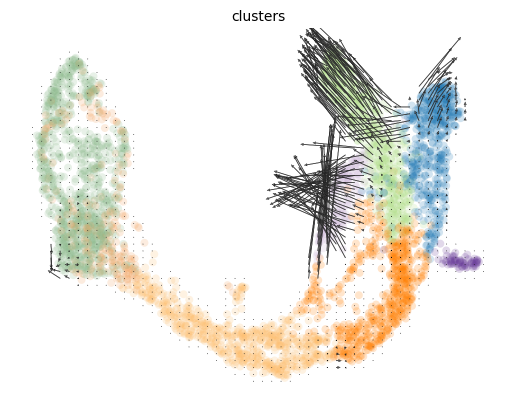

In [16]:
scv.pl.velocity_embedding_grid(adata, color="clusters", arrow_length=4)

In [ ]:
adata[0,"Terf1"].layers["Ms"]

In [ ]:
import pandas as pd
cd_df = pd.read_csv("cd_df.csv")
cd_df

In [ ]:
cellDancer_df_u_s

In [ ]:
set(adata.var_names) - set(cellDancer_df_u_s.gene_name)

In [ ]:
cd_df.unsplice.iloc[idx]

In [ ]:
adata[cell_id, gname].layers["Mu"]

In [ ]:
np.absolute(adata[cell_id, gname].layers["Mu"] - cd_df.unsplice.iloc[idx])[0][0] > 1e-1

In [ ]:
import numpy as np
for idx in range(len(cd_df)):
    print( np.round(100*idx / len(cd_df),2))
    gname = cd_df.gene_name.iloc[idx]
    cell_id = cd_df.cellIndex.iloc[idx]
    assert np.absolute(adata[cell_id, gname].layers["Mu"] - cd_df.unsplice.iloc[idx])[0][0] < 1e-5
    assert np.absolute(adata[cell_id, gname].layers["Ms"] - cd_df.splice.iloc[idx])[0][0] < 1e-5

In [ ]:
import scanpy as sc
import scvelo as scv
#adata = adata[:,np.logical_not(adata.var_names == "Stmn2")].copy()
adata = sc.read_h5ad("cd_adata.h5ad")
assert len(cellDancer_df_u_s) == adata.shape[0] * adata.shape[1]
sc.pp.neighbors(adata)
#sc.tl.umap(adata)
scv.tl.velocity_graph(adata)
scv.tl.velocity_confidence(adata)
scv.tl.velocity_pseudotime(adata)
scv.pl.velocity_embedding_stream(adata, color="clusters")
sc.pl.umap(adata, color="velocity_confidence")
sc.pl.umap(adata, color="velocity_length")
sc.pl.umap(adata, color="velocity_pseudotime", cmap="gnuplot")

In [ ]:
adata.layers["velocity"]

In [ ]:
adata.write_h5ad("cd_adata.h5ad")